# Project 6: I mammiferi depongolo le uova ?

I dataset Zoo fornisce una serie di dati relativi a diverse specie animali al fine di classificarle in 7 diverse
classi, ovvero mammiferi, uccelli, rettili, pesci, anfibi, insetti e invertebrati.

Seguendo un approccio non supervisionato, ovvero senza osservare la classe di ogni specie animale, il
progetto mira a confrontare le diverse specie e raggruparle utilizzando diversi algoritmi di clustering.

Confrontando poi il risultato di ogni algoritmo, si intende mostrare quale algoritmo di clustering approssimi
meglio le classi fornite dal dataset.

Si richiede pertanto non solo di definire una metodologia per confrontare i risulati del clustering con la
classificazione attesa, ma anche di descrivere in modo sintetico le caratteristiche distintive di ciascun cluster
di specie prodotto dall'algoritmo oggetto della valutazione.

https://www.kaggle.com/uciml/zoo-animal-classification

## Summary

- Import Python Classes - importazione delle classi Python, SKLearn per il preprocessing dei dati e la computazione di ML e Matplotlib

- Import Data - importazione dei csv files

- Dataset Exploration - esplorazione dei dati importati

- Preprocessing - processiamo i dati

- Features Transformation - trasformazione delle features

- Clustering - applicazione degli algoritmi di machine learning sui dati

- Pipeline - definiamo una pipeline a tre stadi in cui eseguire: preprocessing, feat. trasformation e clustering

# TO DO:

Progettare Oggetti per:

1)
Import Data

2)
Preprocessing

3)
Feature Transformation

4)
Clustering

5)
Pipeline


---

## Import Python classes

In [51]:
# Base libraries
import pandas as pd
import numpy as np

In [52]:
#Preprocessing libraries
from sklearn import preprocessing as p
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [53]:
#ML libraries
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [54]:
#Pipeline library
from sklearn.pipeline import Pipeline

In [55]:
#Graphic libraries
import matplotlib.pyplot as plt 
import seaborn as sns

---

## Import Data

- import zoo data
- import classes data

In [56]:
zoo = pd.read_csv('./data/zoo.csv')
classes = pd.read_csv('./data/class.csv')

In [57]:
#zoo = zoo.drop(['label'],axis=1)

---

## Dataset Exploration

- check dataframe shape
- check dataframe columns
- check dataframe contents
- check dataframe stats
- assess missing data
- assess outliers data

### Zoo Dataframe

In [58]:
print(zoo.shape)

(101, 18)


In [59]:
print(zoo.columns)

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')


In [60]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [61]:
display(zoo.describe().T)

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


#### Assess missing data

In [62]:
# Perform an assessment of how much missing data there is in each column of the dataset

null_ser = zoo.isnull().sum()

null_ser_perc = (zoo.isnull().sum()/len(zoo))*100

null_dict = {'num of missing':null_ser.values,'perc of missing':null_ser_perc}

zoo_null_df = pd.DataFrame(data=null_dict,index=null_ser.index)

zoo_null_df.sort_values(by='num of missing',ascending=False,inplace=True)

In [63]:
# Dataframe with Number of missings and % of missings for each columns (represented as inde

zoo_null_df

,num of missing,perc of missing
animal_name,0,0.0
hair,0,0.0
catsize,0,0.0
domestic,0,0.0
tail,0,0.0
legs,0,0.0
fins,0,0.0
venomous,0,0.0
breathes,0,0.0
backbone,0,0.0


#### Assess outliers data

<AxesSubplot:>

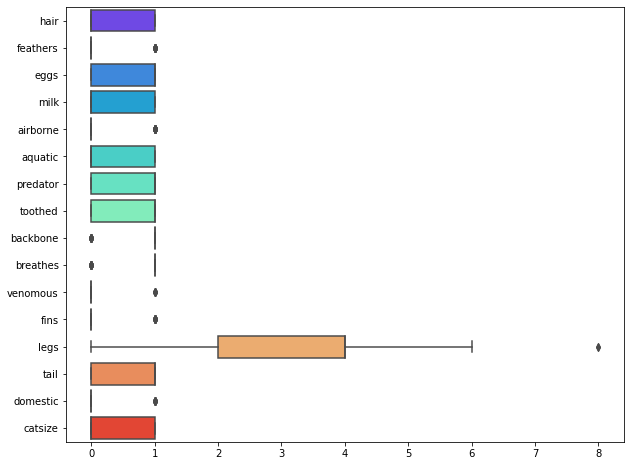

In [64]:
# Già il describe aveva evidenziato l'assenza di Outliers

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(ax=ax, data=zoo.loc[:,zoo.columns != 'class_type'], orient='h', palette='rainbow')

In [65]:
#IQR = np.percentile(zoo['backbone'], 75) - np.percentile(zoo['backbone'], 25)
#Q1 = np.percentile(zoo['backbone'], 25)
#Q3 = np.percentile(zoo['backbone'], 75)
#LB = Q1 - 1.5*IQR
#UB = Q3 + 1.5*IQR
#print(LB,UB)

### Classes Dataframe

In [66]:
print(classes.shape)

(7, 4)


In [67]:
print(classes.columns)

Index(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Class_Type',
       'Animal_Names'],
      dtype='object')


In [68]:
classes.head(10)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [69]:
#display(classes.describe().T)

#### Assess missing data

In [70]:
# Perform an assessment of how much missing data there is in each column of the dataset

null_ser = classes.isnull().sum()
null_ser_perc = (classes.isnull().sum()/len(classes))*100

null_dict = {'num of missing':null_ser.values, 'perc of missing': null_ser_perc}

classes_null_df = pd.DataFrame(data=null_dict, index=null_ser.index)

classes_null_df.sort_values(by='num of missing', ascending=False, inplace=True)

In [71]:
# Dataframe with Number of missings and % of missings for each columns (represented as index)

classes_null_df

,num of missing,perc of missing
Class_Number,0,0.0
Number_Of_Animal_Species_In_Class,0,0.0
Class_Type,0,0.0
Animal_Names,0,0.0


#### Assess outliers data

In [72]:
# Per il DataFrame classes non ha senso la ricerca

---

## Preprocessing

- drop off columns not needed
- ~impute missing data~
- ~impute outliers data~

### Drop off columns not needed

#### Zoo Dataframe

In [73]:
zoo_drop = zoo.drop(['animal_name','class_type'],axis=1)

In [74]:
zoo_drop.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [75]:
zoo_drop.shape

(101, 16)

### Impute missing data

In [76]:
#No Missing Data

### Impute outliers data

In [77]:
#No Outliers

---

## Feature Transformation

- ~merge~
- rename classes dataset columns
- ~re-encode categorical features~
- re-encode numerical features:
    - Standard Scaler
    - MinMax Scaler
- one hot encoding for legs column
    - yes
    - no

### Merge

In [78]:
#zoo = pd.merge(zoo,classes,left_on='class_type',right_on='class_type')

### Rename Columns

In [79]:
classes.rename(columns={'Class_Type': 'class_name', 'Class_Number': 'class_type'}, inplace=True)

### Re-encode categorical features

In [80]:
#zoo_drop.columns

### Re-encode numerical features
- Standardize
- Normalize

In [81]:
zoo_drop_ss = p.StandardScaler().fit_transform(zoo_drop)
zoo_drop_ss = pd.DataFrame(zoo_drop_ss)

In [82]:
zoo_drop_ss.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


In [83]:
#(0-zoo_drop['hair'].mean())/(zoo_drop['hair'].std())

In [84]:
zoo_drop_mm = p.MinMaxScaler().fit_transform(zoo_drop)
zoo_drop_mm = pd.DataFrame(zoo_drop_mm)

In [85]:
zoo_drop_mm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0


In [86]:
#(7-zoo_drop['legs'].min())/(zoo_drop['legs'].max()-zoo_drop['legs'].min())

### One Hot Encoding - legs columns

In [87]:
zoo_oneh = pd.get_dummies(zoo_drop['legs'], prefix='legs')

zoo_drop_ = zoo_drop[[x for x in zoo_drop.columns if x != 'legs']]
    
zoo_drop_oneh = zoo_drop_.join(zoo_oneh)

## Clustering

- KMeans
- DBScan
- AgglomerativeClustering

In [88]:
# https://scikit-learn.org/stable/modules/clustering.html#clustering

In [89]:
#zoo_final = zoo_drop_ss.copy()
#zoo_final = zoo_drop_mm.copy()

In [90]:
n_clusters = 7

### Class definition

In [91]:
class clustering_class(object):

    algorithm_name=None
    zoo_class_type = None
    zoo_animal_name = None
    zoo_data_pp = None
    algorithm = None
    prediction = None
    df_stats = None
    
    def __init__(self, classes, zoo_data_pp, zoo_class_type, zoo_animal_name, algorithm):
        
        # Init method
        self.zoo_class_type = zoo_class_type
        self.zoo_animal_name = zoo_animal_name
        self.zoo_data_pp = zoo_data_pp
        self.algorithm = algorithm
        self.prediction = None
        self.df_stats = pd.DataFrame(columns=['class_name', 'cluster_nbr', 'amount', 'total'])
    
    def fit(self):
        pass
    
    def predict(self):
        pass
            
    def fit_predict(self):
        
        # Fit and Predict method
        self.prediction = pd.Series(self.algorithm.fit_predict(self.zoo_data_pp), name='class_type_pred')
        
    def calc_stats(self):
        
        # Output: (Dataframe): class_name - cluster_nbr - amount - total
        df = pd.concat([self.zoo_class_type, self.prediction], axis=1)
        df['count'] = 1

        df = pd.merge(df,classes,left_on='class_type',right_on='class_type')
        
        df = df[['class_name','class_type_pred','count']].groupby(['class_name','class_type_pred']).sum()
        df.reset_index(inplace=True)

        df_pivoted = df.pivot(index='class_name', columns=['class_type_pred'], values='count')
        
        for index, row in df_pivoted.iterrows():
            for col_index,col in enumerate(row.values):
                if col > 0:
                    self.df_stats = self.df_stats.append({'class_name': index, 'cluster_nbr': col_index, 'amount': int(col), 'total': int(row.sum()) } ,ignore_index=True)
                    
    def calc_associations(self):
        
        # TODO
        # Output: (Dataframe): animal_name - class_name - cluster_nbr
        pass
                    
    def show_stats(self):
        
        # Show statistics method
        for index, row in self.df_stats.iterrows():
            amount = row['amount']
            total = row['total']
            class_name = row['class_name']
            cluster_nbr = row['cluster_nbr']
            print('[{}/{}] of {}s have been put into Cluster Nbr. {} : ({:.1f}%)'.format(amount,total,class_name,cluster_nbr,(amount/total)*100))

    def show_associations(self):
        
        # TODO
        # Input: nome animale
        # Output: cluster associato
        pass

    def show_barplots(self):
        
        # Show Barplots method
        # TODO - Barplots
        pass


#### K-Means

In [92]:
# TODO - Optimize Hyperparameters

kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++', random_state = 42)

In [93]:
c1 = clustering_class(classes.copy(),zoo_drop_ss.copy(),zoo['class_type'],zoo['animal_name'],kmeans)
c1.fit_predict()
c1.calc_stats()
c1.show_stats()

[4/4] of Amphibians have been put into Cluster Nbr. 4 : (100.0%)
[20/20] of Birds have been put into Cluster Nbr. 2 : (100.0%)
[8/8] of Bugs have been put into Cluster Nbr. 6 : (100.0%)
[13/13] of Fishs have been put into Cluster Nbr. 0 : (100.0%)
[7/10] of Invertebrates have been put into Cluster Nbr. 3 : (70.0%)
[3/10] of Invertebrates have been put into Cluster Nbr. 6 : (30.0%)
[37/41] of Mammals have been put into Cluster Nbr. 1 : (90.2%)
[4/41] of Mammals have been put into Cluster Nbr. 5 : (9.8%)
[1/5] of Reptiles have been put into Cluster Nbr. 2 : (20.0%)
[4/5] of Reptiles have been put into Cluster Nbr. 4 : (80.0%)


#### DBScan

In [94]:
# TODO - Optimize Hyperparameters

dbscan = DBSCAN(eps=0.5, min_samples=4)

In [95]:
c2 = clustering_class(classes.copy(),zoo_drop_ss.copy(),zoo['class_type'],zoo['animal_name'],dbscan)
c2.fit_predict()
c2.calc_stats()
c2.show_stats()

[4/4] of Amphibians have been put into Cluster Nbr. 0 : (100.0%)
[16/20] of Birds have been put into Cluster Nbr. 0 : (80.0%)
[4/20] of Birds have been put into Cluster Nbr. 5 : (20.0%)
[8/8] of Bugs have been put into Cluster Nbr. 0 : (100.0%)
[8/13] of Fishs have been put into Cluster Nbr. 0 : (61.5%)
[5/13] of Fishs have been put into Cluster Nbr. 2 : (38.5%)
[6/10] of Invertebrates have been put into Cluster Nbr. 0 : (60.0%)
[4/10] of Invertebrates have been put into Cluster Nbr. 6 : (40.0%)
[21/41] of Mammals have been put into Cluster Nbr. 0 : (51.2%)
[6/41] of Mammals have been put into Cluster Nbr. 1 : (14.6%)
[10/41] of Mammals have been put into Cluster Nbr. 3 : (24.4%)
[4/41] of Mammals have been put into Cluster Nbr. 4 : (9.8%)
[5/5] of Reptiles have been put into Cluster Nbr. 0 : (100.0%)


#### Clustering Gerarchico

In [96]:
# TODO - Optimize Hyperparameters

agglcluster = AgglomerativeClustering(n_clusters=n_clusters)

In [97]:
c3 = clustering_class(classes.copy(),zoo_drop_ss.copy(),zoo['class_type'],zoo['animal_name'],agglcluster)
c3.fit_predict()
c3.calc_stats()
c3.show_stats()

[4/4] of Amphibians have been put into Cluster Nbr. 1 : (100.0%)
[20/20] of Birds have been put into Cluster Nbr. 3 : (100.0%)
[8/8] of Bugs have been put into Cluster Nbr. 0 : (100.0%)
[1/13] of Fishs have been put into Cluster Nbr. 1 : (7.7%)
[12/13] of Fishs have been put into Cluster Nbr. 4 : (92.3%)
[9/10] of Invertebrates have been put into Cluster Nbr. 0 : (90.0%)
[1/10] of Invertebrates have been put into Cluster Nbr. 1 : (10.0%)
[29/41] of Mammals have been put into Cluster Nbr. 2 : (70.7%)
[8/41] of Mammals have been put into Cluster Nbr. 5 : (19.5%)
[4/41] of Mammals have been put into Cluster Nbr. 6 : (9.8%)
[4/5] of Reptiles have been put into Cluster Nbr. 1 : (80.0%)
[1/5] of Reptiles have been put into Cluster Nbr. 3 : (20.0%)


---

## Pipeline

Definiamo una pipeline a tre stadi in cui eseguire: preprocessing, feat. trasformation e clustering che precedentemente abbiamo eseguito sequenzialmente

- 1st stage: preprocessing
- 2nd stage: transforming
- 3th stage: clustering
- 4th stage: print results (stats, print2D)

### Class preprocessing

In [98]:
class preprocessing(object):
    
    def __init__(self):
        print('init - preprocessing')
        pass
    
    def fit(self, X, Y=None):
        print('fit - preprocessing')
        return self
    
    def transform(self, X, Y=None):
        print('transform - preprocessing')
        return X.drop(['animal_name','class_type'],axis=1)
    
    def fit_transform(self, X, Y=None):
        print('fit_transform - preprocessing')
        self.fit(X, Y)
        return self.transform(X, Y)

### Class transforming

In [99]:
class transforming(object):

    scaler_method=None
    ohe_legs=None
    
    def __init__(self, scaler_method='StandardScaler', ohe_legs=False):
        print('init - transforming')
        self.scaler_method=scaler_method
        self.ohe_legs=ohe_legs
        pass
    
    def fit(self, X, Y=None):
        print('fit - transforming')
        return self
    
    def transform(self, X, Y=None):
        print('transform - transforming')
        if self.scaler_method == 'StandardScaler':
            X = pd.DataFrame(p.StandardScaler().fit_transform(X))
        elif self.scaler_method == 'MinMaxScaler':
            X = pd.DataFrame(p.MinMaxScaler().fit_transform(X))
        if self.ohe_legs:
            X_oneh = pd.get_dummies(X['legs'], prefix='legs')
            X_wo_legs = X[[x for x in X.columns if x != 'legs']] 
            X = X_wo_legs.join(X_oneh)
        return X
    
    def fit_transform(self, X, Y=None):
        print('fit_transform - transforming')
        self.fit(X, Y)
        return self.transform(X, Y)    

### Class clustering

In [100]:
class clustering(object):

    algorithm = None
    n_cluters = 7
    
    def __init__(self, algorithm=KMeans, n_clusters=7):
        print('init - clustering')
        self.algorithm=algorithm
        self.n_clusters=n_clusters
        pass
    
    def fit(self, X, Y=None):
        print('fit - clustering')
        self.algorithm.fit(X)
        return self
    
    def predict(self, X, Y=None):
        print('predict - clustering')
        X = self.algorithm.predict(X)
        return X
    
    def fit_predict(self, X, Y=None):
        print('fit_predict - clustering')
        self.fit(X, Y)
        return self.predict(X, Y)  

---

Istanziamo un oggetto KMeans ed utilizziamolo nella Pipeline
Possiamo fare lo stesso per DBScan e AgglomerativeClustering

TODO:
parte di valutazione/comparazione algoritmi
- calc_stats()
- show_stats()

In [101]:
kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++', random_state = 42)

In [102]:
pipe_3 = Pipeline([
    ("preprocessing", preprocessing()),
    ("transforming", transforming(MinMaxScaler,True)),
    ('clustering', clustering(kmeans,7))
])

init - preprocessing
init - transforming
init - clustering


In [103]:
out_3 = pipe_3.fit_predict(zoo)

fit_transform - preprocessing
fit - preprocessing
transform - preprocessing
fit_transform - transforming
fit - transforming
transform - transforming
fit_predict - clustering
fit - clustering
predict - clustering


In [104]:
out_3

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 3, 4, 5, 5, 5, 3, 1, 4, 4, 3, 3,
       1, 3, 6, 0, 0, 2, 1, 2, 6, 1, 2, 3, 4, 1, 1, 3, 4, 6, 6, 3, 6, 3,
       1, 1, 5, 1, 1, 1, 1, 6, 0, 5, 1, 1, 3, 3, 3, 3, 4, 4, 0, 1, 1, 1,
       4, 1, 1, 1, 1, 3, 0, 4, 4, 2, 4, 5, 3, 3, 0, 6, 4, 3, 2, 5, 4, 3,
       6, 0, 0, 0, 4, 2, 1, 3, 2, 6, 1, 6, 3])